In [1]:
from keras.models import load_model
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.metrics import top_k_categorical_accuracy
import cv2

Using TensorFlow backend.


In [2]:
def preProcImg(img):
    r,c,x = img.shape
    top = bottom = left = right = 0
    if r < c:
        top = bottom = (c-r)//2
    if r > c:
        left = right = (r-c)//2
    img = cv2.copyMakeBorder(
        img,
        top=top,
        bottom=bottom,
        left=left,
        right=right,
        borderType=cv2.BORDER_CONSTANT,
        value=[255, 255, 255]
    )
    return cv2.resize(img, dsize=(299, 299), interpolation=cv2.INTER_CUBIC)
def top_5_accuracy(y_true, y_pred): 
    return top_k_categorical_accuracy(y_true, y_pred, k=5)
classes = ["cereza", "durazno", "fresa",
 "lechuga", "limon", "mango",
 "manzana", "maracuya", "naranja",
 "palta", "pera", "piña", "sandia"
 ]
model_file = "epoch#3 weights.best.InceptionV3_final_model.hdf5"
loaded_model = load_model(model_file, custom_objects={"top_5_accuracy": top_5_accuracy})

In [3]:
def predict_image(path, plot=False):
    img = cv2.imread("test.jpg")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = preProcImg(img)
    prediction = loaded_model.predict(np.array([img]))[0]
    if plot:
        plt.figure(figsize=(11,4))
        x = np.arange(len(classes))
        plt.subplot(1,2,1)
        plt.bar(x, prediction)
        plt.xticks(x, classes, rotation='vertical')
        
        plt.subplot(1,2,2)
        plt.imshow(img)
        
        plt.show()
    return classes[np.argmax(prediction)]

In [4]:
predict_image("test.jpg")

'sandia'

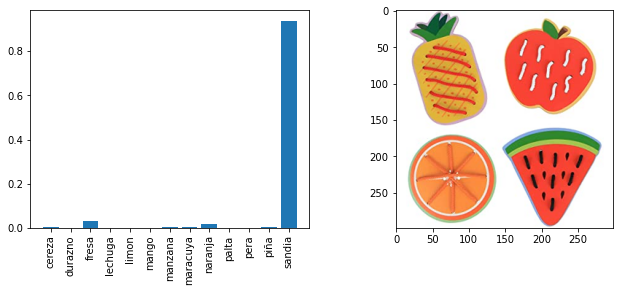

'sandia'

In [5]:
predict_image("test.jpg", plot=1)